In [1]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: SQLAlchemy in c:\users\alekh\appdata\local\programs\python\python312\lib\site-packages (2.0.31)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import requests
import pandas as pd
from datetime import datetime,timedelta
from collections import Counter
import sqlalchemy as sa
import numpy as np
from matplotlib import pyplot as plt

# Connecting to Databse using username and password for authentication.

In [5]:
connection_url = sa.engine.URL.create(
    drivername = "mssql+pyodbc",
    username   = "alekhyae",       ## Please add your user
    password   = "2024!Schulich",
    host       = "mmai2024-ms-sql-server.c1oick8a8ywa.ca-central-1.rds.amazonaws.com",
    port       = "1433",
    database   = "alekhyae_db",       ## Please add your database
    query = {
        "driver" : "ODBC Driver 18 for SQL Server",
        "TrustServerCertificate" : "yes"
    }
)

In [6]:
my_engine = sa.create_engine(connection_url)

In [7]:
# Fetch postal codes with lat and lon from the database
postal_codes_df = pd.read_sql('SELECT * FROM uploads.postal_codes', my_engine)

In [8]:
#create empty lists to store the data
weather_data_list = []
forecasting_data_list=[]

# Current Weather

In [9]:

api_url = 'https://api.openweathermap.org/data/2.5/weather'

#loop through every postal code to fetch and store current weather data
for index, row in postal_codes_df.iterrows():
        my_query_parameters = {
              'lat': row['latitude'],
              'lon': row['longitude'],
        'units': 'metric',
            'appid': '51e1b785d1c53673d1ab963a4ec63b88'
        }

        my_request_headers = {
            'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15'
        }

        response = requests.get(url=api_url, params=my_query_parameters, headers=my_request_headers)
        data = response.json()

        # Print the response data for checking
        print(f"Response for {row['postal_code']}:\n", data, "\n")

        dt = datetime.utcfromtimestamp(data["dt"]).date()
            # Prepare data for DataFrame
        weather_data = {
                "postal_code": row['postal_code'],
                "date": dt,
                "city": data["name"],
                "temperature (°C)": data["main"]["temp"],
                "humidity(%)": data["main"]["humidity"],
                "wind_speed(m/s)": data["wind"]["speed"],
                "weather_description": data["weather"][0]["description"],
                "feels_like(°C)": data["main"]["feels_like"],
                "temp_min(°C)": data["main"]["temp_min"],
                "temp_max(°C)": data["main"]["temp_max"],
                "atmospheric_pressure(hPa)": data["main"]["pressure"],
                "visibility_distance(m)": data["visibility"],
                "cloudiness_percentage": data["clouds"]["all"]
            }

   # Append the weather data to the list
        weather_data_list.append(weather_data)
 

Response for M1B0A1:
 {'coord': {'lon': -79.2797, 'lat': 43.6865}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.48, 'feels_like': 25.02, 'temp_min': 23.1, 'temp_max': 25.41, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 240}, 'clouds': {'all': 100}, 'dt': 1722653174, 'sys': {'type': 2, 'id': 2040045, 'country': 'CA', 'sunrise': 1722593262, 'sunset': 1722645533}, 'timezone': -14400, 'id': 7870846, 'name': 'Little India', 'cod': 200} 



C:\Users\alekh\AppData\Local\Temp\ipykernel_61520\1086203663.py:22: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt = datetime.utcfromtimestamp(data["dt"]).date()


Response for M1B0A3:
 {'coord': {'lon': -79.1563, 'lat': 43.797}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.44, 'feels_like': 25.05, 'temp_min': 23.15, 'temp_max': 25.46, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.24, 'deg': 230, 'gust': 1.18}, 'clouds': {'all': 97}, 'dt': 1722653175, 'sys': {'type': 2, 'id': 2091082, 'country': 'CA', 'sunrise': 1722593215, 'sunset': 1722645521}, 'timezone': -14400, 'id': 6178999, 'name': 'West Hill', 'cod': 200} 

Response for M1B0A4:
 {'coord': {'lon': -79.1563, 'lat': 43.797}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.44, 'feels_like': 25.05, 'temp_min': 23.15, 'temp_max': 25.46, 'pressure': 1011, 'humidity': 81, 'sea_level': 1011, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.24, 'deg'

In [11]:
weather_df = pd.DataFrame(weather_data_list)

In [12]:
weather_df.head(16)

,postal_code,date,city,temperature (°C),humidity(%),wind_speed(m/s),weather_description,feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),visibility_distance(m),cloudiness_percentage
0,M1B0A1,2024-08-03,Little India,24.48,78,3.09,overcast clouds,25.02,23.10,25.41,1010,10000,100
1,M1B0A3,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97
2,M1B0A4,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97
3,M1B0A5,2024-08-03,West Hill,24.25,78,1.12,overcast clouds,24.77,22.89,25.20,1011,10000,95
4,M1B0A6,2024-08-03,West Hill,24.22,79,1.13,overcast clouds,24.76,22.88,25.18,1011,10000,96
5,M1B0A7,2024-08-03,West Hill,24.34,80,1.13,overcast clouds,24.92,23.02,25.33,1011,10000,96
6,M1B0A8,2024-08-03,West Hill,24.40,80,1.20,overcast clouds,24.98,23.10,25.41,1011,10000,97
7,M1B0A9,2024-08-03,West Hill,24.40,80,1.20,overcast clouds,24.98,23.10,25.41,1011,10000,97
8,M1B0B1,2024-08-03,West Hill,24.40,80,1.20,overcast clouds,24.98,23.10,25.41,1011,10000,97
9,M1B0B2,2024-08-03,West Hill,24.39,80,1.22,overcast clouds,24.97,23.10,25.40,1011,10000,95


In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   postal_code                21 non-null     object 
 1   date                       21 non-null     object 
 2   city                       21 non-null     object 
 3   temperature (°C)           21 non-null     float64
 4   humidity(%)                21 non-null     int64  
 5   wind_speed(m/s)            21 non-null     float64
 6   weather_description        21 non-null     object 
 7   feels_like(°C)             21 non-null     float64
 8   temp_min(°C)               21 non-null     float64
 9   temp_max(°C)               21 non-null     float64
 10  atmospheric_pressure(hPa)  21 non-null     int64  
 11  visibility_distance(m)     21 non-null     int64  
 12  cloudiness_percentage      21 non-null     int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 2.3

In [14]:
weather_df.describe()

,temperature (°C),humidity(%),wind_speed(m/s),feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),visibility_distance(m),cloudiness_percentage
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000
mean,24.352857,79.714286,1.360952,24.924762,23.024286,25.332857,1010.952381,10000.0,96.523810
std,0.104935,1.146423,0.576740,0.135596,0.129173,0.129195,0.218218,0.0,1.435933
min,24.170000,78.000000,1.120000,24.710000,22.800000,25.110000,1010.000000,10000.0,95.000000
25%,24.250000,79.000000,1.130000,24.770000,22.890000,25.200000,1011.000000,10000.0,95.000000
50%,24.390000,80.000000,1.200000,24.970000,23.100000,25.400000,1011.000000,10000.0,97.000000
75%,24.440000,80.000000,1.240000,25.020000,23.110000,25.420000,1011.000000,10000.0,97.000000
max,24.510000,82.000000,3.090000,25.160000,23.220000,25.530000,1011.000000,10000.0,100.000000


#Feature Engineering

In [15]:
#creating a  new feature that represents the difference between the maximum and minimum temperatures of the day.
weather_df['temp_diff(°C)'] = weather_df['temp_max(°C)'] - weather_df['temp_min(°C)']

In [16]:
weather_df.head()

,postal_code,date,city,temperature (°C),humidity(%),wind_speed(m/s),weather_description,feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),visibility_distance(m),cloudiness_percentage,temp_diff(°C)
0,M1B0A1,2024-08-03,Little India,24.48,78,3.09,overcast clouds,25.02,23.10,25.41,1010,10000,100,2.31
1,M1B0A3,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97,2.31
2,M1B0A4,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97,2.31
3,M1B0A5,2024-08-03,West Hill,24.25,78,1.12,overcast clouds,24.77,22.89,25.20,1011,10000,95,2.31
4,M1B0A6,2024-08-03,West Hill,24.22,79,1.13,overcast clouds,24.76,22.88,25.18,1011,10000,96,2.30


Catergorizing the weather description into 3 categories

In [17]:
weather_df['weather_description'].unique()

array(['overcast clouds'], dtype=object)

In [18]:
def categorize_weather(description):
    if description in ['clear sky']:
        return 'Clear'
    elif description in ['few clouds', 'broken clouds', 'scattered clouds', 'overcast clouds', 'fog', 'haze']:
        return 'Cloudy'
    elif description in ['light rain']:
        return 'Rainy'
    else:
        return 'Unknown'

In [19]:
weather_df['weather_today'] = weather_df['weather_description'].apply(categorize_weather)

In [20]:
weather_df.head()

,postal_code,date,city,temperature (°C),humidity(%),wind_speed(m/s),weather_description,feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),visibility_distance(m),cloudiness_percentage,temp_diff(°C),weather_today
0,M1B0A1,2024-08-03,Little India,24.48,78,3.09,overcast clouds,25.02,23.10,25.41,1010,10000,100,2.31,Cloudy
1,M1B0A3,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97,2.31,Cloudy
2,M1B0A4,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97,2.31,Cloudy
3,M1B0A5,2024-08-03,West Hill,24.25,78,1.12,overcast clouds,24.77,22.89,25.20,1011,10000,95,2.31,Cloudy
4,M1B0A6,2024-08-03,West Hill,24.22,79,1.13,overcast clouds,24.76,22.88,25.18,1011,10000,96,2.30,Cloudy


In [21]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   postal_code                21 non-null     object 
 1   date                       21 non-null     object 
 2   city                       21 non-null     object 
 3   temperature (°C)           21 non-null     float64
 4   humidity(%)                21 non-null     int64  
 5   wind_speed(m/s)            21 non-null     float64
 6   weather_description        21 non-null     object 
 7   feels_like(°C)             21 non-null     float64
 8   temp_min(°C)               21 non-null     float64
 9   temp_max(°C)               21 non-null     float64
 10  atmospheric_pressure(hPa)  21 non-null     int64  
 11  visibility_distance(m)     21 non-null     int64  
 12  cloudiness_percentage      21 non-null     int64  
 13  temp_diff(°C)              21 non-null     float64
 

# Ingesting the data into database in our Microsoft SQL Server

In [24]:

weather_df.to_sql(

    name   = 'Current_Weather_Data',
    con    = my_engine,
    schema = 'uploads',
    if_exists = 'replace',
    index  = False,
    dtype  = {
        'postal_code':sa.types.VARCHAR[50],
        'date': sa.types.DATE,
        'city' :sa.types.VARCHAR[50],
        'temperature (°C)': sa.types.DECIMAL(10,2),
        'humidity(%)': sa.types.INTEGER,
        'wind_speed(m/s)':sa.types.DECIMAL(10,2),
        'weather_description': sa.types.VARCHAR[50],
        'feels_like(°C)': sa.types.DECIMAL(10,2),
        'temp_min(°C)': sa.types.DECIMAL(10,2) ,
        'temp_max(°C)': sa.types.DECIMAL(10,2) , 
        'atmospheric_pressure(hPa)': sa.types.INTEGER,
        'visibility_distance(m)': sa.types.INTEGER,
        'cloudiness_percentage': sa.types.INTEGER,
        'temp_diff(°C)': sa.types.DECIMAL(10,2) ,
        'weather_today': sa.types.VARCHAR[50],

    },
    method = 'multi'
)

21

In [25]:
#function to request the data
my_query = sa.text("SELECT * FROM uploads.Current_Weather_Data;")

with my_engine.connect() as my_connection:
    my_data = pd.read_sql(sql=my_query, con=my_connection)

In [26]:
my_data

,postal_code,date,city,temperature (°C),humidity(%),wind_speed(m/s),weather_description,feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),visibility_distance(m),cloudiness_percentage,temp_diff(°C),weather_today
0,M1B0A1,2024-08-03,Little India,24.48,78,3.09,overcast clouds,25.02,23.10,25.41,1010,10000,100,2.31,Cloudy
1,M1B0A3,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97,2.31,Cloudy
2,M1B0A4,2024-08-03,West Hill,24.44,81,1.24,overcast clouds,25.05,23.15,25.46,1011,10000,97,2.31,Cloudy
3,M1B0A5,2024-08-03,West Hill,24.25,78,1.12,overcast clouds,24.77,22.89,25.20,1011,10000,95,2.31,Cloudy
4,M1B0A6,2024-08-03,West Hill,24.22,79,1.13,overcast clouds,24.76,22.88,25.18,1011,10000,96,2.30,Cloudy
5,M1B0A7,2024-08-03,West Hill,24.34,80,1.13,overcast clouds,24.92,23.02,25.33,1011,10000,96,2.31,Cloudy
6,M1B0A8,2024-08-03,West Hill,24.40,80,1.20,overcast clouds,24.98,23.10,25.41,1011,10000,97,2.31,Cloudy
7,M1B0A9,2024-08-03,West Hill,24.40,80,1.20,overcast clouds,24.98,23.10,25.41,1011,10000,97,2.31,Cloudy
8,M1B0B1,2024-08-03,West Hill,24.40,80,1.20,overcast clouds,24.98,23.10,25.41,1011,10000,97,2.31,Cloudy
9,M1B0B2,2024-08-03,West Hill,24.39,80,1.22,overcast clouds,24.97,23.10,25.40,1011,10000,95,2.30,Cloudy


# Future Weather Forecast

In [27]:

# API credentials
api_url = 'https://api.openweathermap.org/data/2.5/forecast'


# Loop through each postal code to fetch forecast data
for index, row in postal_codes_df.iterrows():
        my_query_parameters = {
              'lat': row['latitude'],
              'lon': row['longitude'],
              'units': 'metric',
              'appid': '51e1b785d1c53673d1ab963a4ec63b88'
        }

        my_request_headers = {
            'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Safari/605.1.15'
        }

        response = requests.get(url=api_url, params=my_query_parameters, headers=my_request_headers)
        data1 = response.json()


        city_name = data1['city']['name']  # Get the city name from the response
        population = data1['city']['population']
        sunrise = datetime.utcfromtimestamp(data1['city']['sunrise']).strftime('%H:%M:%S')
        sunset = datetime.utcfromtimestamp(data1['city']['sunset']).strftime('%H:%M:%S')
            

        # Print the response data for checking
        print(f"Response for {row['postal_code']}:\n", data1, "\n")

        for forecast in data1['list']:
                forecast_data = {
                    "postal_code": row['postal_code'],
                    "city": city_name,
                    "date": forecast['dt_txt'].split()[0],  # Extract the date part
                    "temperature(°C)": forecast["main"]["temp"],
                    "humidity(%)": forecast["main"]["humidity"],
                    "wind_speed(m/s)": forecast["wind"]["speed"],
                    "weather_description": forecast["weather"][0]["description"],
                    "feels_like(°C)":  forecast["main"]["feels_like"],
                    "temp_min(°C)": forecast["main"]["temp_min"],
                    "temp_max(°C)": forecast["main"]["temp_max"],
                    "atmospheric_pressure(hPa)": forecast["main"]["pressure"],
                    "cloudiness_percentage": forecast["clouds"]["all"],
                    "population": population,
                    "sunrise": sunrise,
                    "sunset": sunset
                }

                # Append the weather data to the list
                forecasting_data_list.append(forecast_data)

# Create a DataFrame from the weather data list
forecast_df = pd.DataFrame(forecasting_data_list)



C:\Users\alekh\AppData\Local\Temp\ipykernel_61520\2622477974.py:24: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  sunrise = datetime.utcfromtimestamp(data1['city']['sunrise']).strftime('%H:%M:%S')
C:\Users\alekh\AppData\Local\Temp\ipykernel_61520\2622477974.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  sunset = datetime.utcfromtimestamp(data1['city']['sunset']).strftime('%H:%M:%S')


Response for M1B0A1:
 {'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1722654000, 'main': {'temp': 24.48, 'feels_like': 25.02, 'temp_min': 22.95, 'temp_max': 24.48, 'pressure': 1010, 'sea_level': 1010, 'grnd_level': 999, 'humidity': 78, 'temp_kf': 1.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 100}, 'wind': {'speed': 1.47, 'deg': 215, 'gust': 1.69}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-08-03 03:00:00'}, {'dt': 1722664800, 'main': {'temp': 23.78, 'feels_like': 24.3, 'temp_min': 22.39, 'temp_max': 23.78, 'pressure': 1010, 'sea_level': 1010, 'grnd_level': 998, 'humidity': 80, 'temp_kf': 1.39}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 100}, 'wind': {'speed': 1.71, 'deg': 258, 'gust': 1.92}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-08-03 06:00:00'}, {'dt': 1722675600, 'main': {'temp': 23

In [28]:
# Aggregate data to display daily weather instead of hourly
def most_common(lst):
    return Counter(lst).most_common(1)[0][0]

# various weather metrics such as temperature, feels like temperature, minimum and maximum temperature, atmospheric pressure, humidity, and wind speed are calculated by  their mean values 
future_forecast_df = forecast_df.groupby(['postal_code', 'city', 'date', 'population', 'sunrise', 'sunset']).agg({
    'temperature(°C)': 'mean',
    'feels_like(°C)' : 'mean',
    "temp_min(°C)"   : 'mean',
    "temp_max(°C)"   : 'mean' ,
    'atmospheric_pressure(hPa)' : 'mean',
    'humidity(%)': 'mean',
    'wind_speed(m/s)': 'mean',
    'cloudiness_percentage':'mean',
    'weather_description': lambda x: most_common(x)
}).reset_index()

# Display the combined weather data for the next 6 days
print(future_forecast_df)

    postal_code          city        date  population   sunrise    sunset  \
0        M1B0A1  Little India  2024-08-03           0  10:07:42  00:38:53   
1        M1B0A1  Little India  2024-08-04           0  10:07:42  00:38:53   
2        M1B0A1  Little India  2024-08-05           0  10:07:42  00:38:53   
3        M1B0A1  Little India  2024-08-06           0  10:07:42  00:38:53   
4        M1B0A1  Little India  2024-08-07           0  10:07:42  00:38:53   
..          ...           ...         ...         ...       ...       ...   
121      M1B0C5     West Hill  2024-08-04           0  10:07:14  00:38:59   
122      M1B0C5     West Hill  2024-08-05           0  10:07:14  00:38:59   
123      M1B0C5     West Hill  2024-08-06           0  10:07:14  00:38:59   
124      M1B0C5     West Hill  2024-08-07           0  10:07:14  00:38:59   
125      M1B0C5     West Hill  2024-08-08           0  10:07:14  00:38:59   

     temperature(°C)  feels_like(°C)  temp_min(°C)  temp_max(°C)  \
0      

In [29]:
future_forecast_df.head()

,postal_code,city,date,population,sunrise,sunset,temperature(°C),feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),humidity(%),wind_speed(m/s),cloudiness_percentage,weather_description
0,M1B0A1,Little India,2024-08-03,0,10:07:42,00:38:53,24.604286,24.905714,24.085714,24.604286,1009.857143,72.571429,2.057143,100.000,overcast clouds
1,M1B0A1,Little India,2024-08-04,0,10:07:42,00:38:53,25.086250,25.161250,25.086250,25.086250,1011.000000,61.625000,2.532500,40.000,clear sky
2,M1B0A1,Little India,2024-08-05,0,10:07:42,00:38:53,23.222500,23.452500,23.222500,23.222500,1014.625000,69.750000,2.875000,66.125,light rain
3,M1B0A1,Little India,2024-08-06,0,10:07:42,00:38:53,21.138750,20.923750,21.138750,21.138750,1015.750000,61.875000,3.415000,92.625,overcast clouds
4,M1B0A1,Little India,2024-08-07,0,10:07:42,00:38:53,21.268750,21.070000,21.268750,21.268750,1010.125000,62.000000,5.050000,60.625,overcast clouds


In [30]:
future_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   postal_code                126 non-null    object 
 1   city                       126 non-null    object 
 2   date                       126 non-null    object 
 3   population                 126 non-null    int64  
 4   sunrise                    126 non-null    object 
 5   sunset                     126 non-null    object 
 6   temperature(°C)            126 non-null    float64
 7   feels_like(°C)             126 non-null    float64
 8   temp_min(°C)               126 non-null    float64
 9   temp_max(°C)               126 non-null    float64
 10  atmospheric_pressure(hPa)  126 non-null    float64
 11  humidity(%)                126 non-null    float64
 12  wind_speed(m/s)            126 non-null    float64
 13  cloudiness_percentage      126 non-null    float64

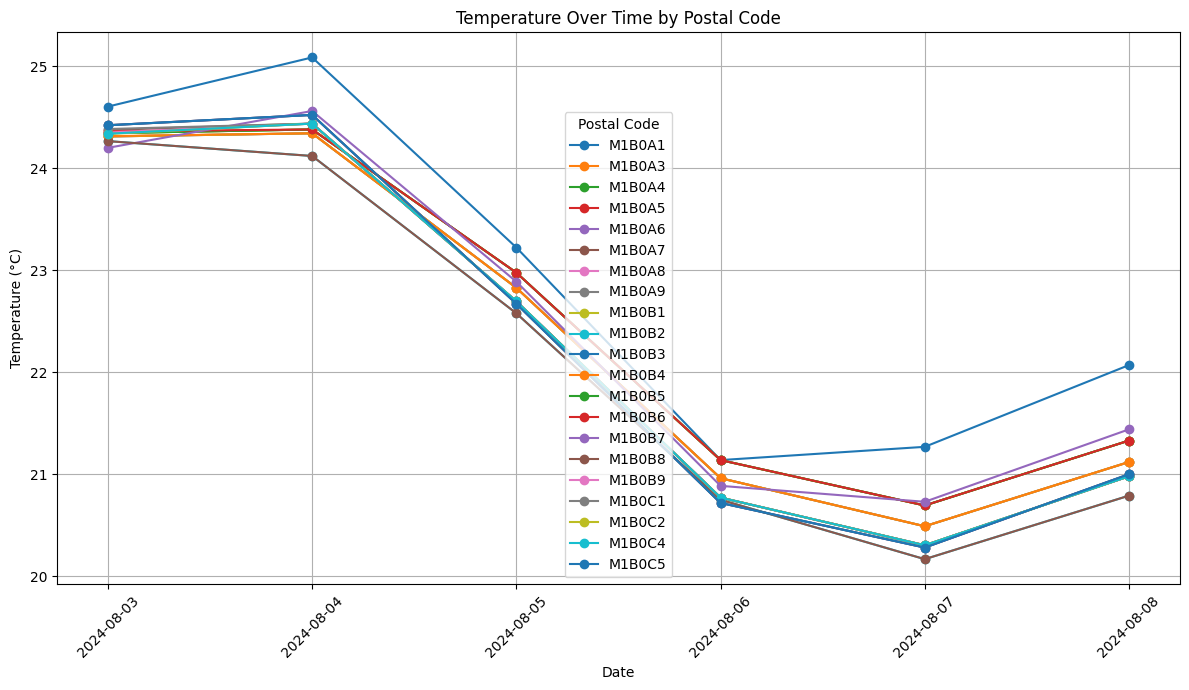

In [31]:
plt.figure(figsize=(12, 7))

for postal_code in future_forecast_df['postal_code'].unique():
    subset = future_forecast_df[future_forecast_df['postal_code'] == postal_code]
    plt.plot(subset['date'], subset['temperature(°C)'], marker='o', label=postal_code)

plt.title('Temperature Over Time by Postal Code')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='Postal Code')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The temperature trends over the past week for multiple postal codes in Toronto reveal a consistent pattern. Initial temperatures hovered around 24°C, experiencing a notable dip to around 21°C by August 6, before gradually rising again towards 23°C by August 8. This data suggests a temporary cooling period, potentially influenced by weather fronts or precipitation events. For businesses relying on weather data, such as logistics and retail, this trend indicates a need for adaptive planning to mitigate any potential impacts on operations, customer behavior, and supply chain logistics.

In [32]:
#categorize the temperature into 2 kinds
future_forecast_df['typeofday'] = future_forecast_df['temperature(°C)'].apply(lambda x: 'warm day' if x >= 20 else 'Chilly Day')

In [33]:
#dividing the weather description into 3 categories
def categorize_weather(description):
    if description in ['clear sky']:
        return 'Clear'
    elif description in ['few clouds', 'broken clouds', 'scattered clouds', 'overcast clouds', 'fog', 'haze']:
        return 'Cloudy'
    elif description in ['light rain']:
        return 'Rainy'
    else:
        return 'Unknown'

In [34]:
future_forecast_df['weather_today'] = future_forecast_df['weather_description'].apply(categorize_weather)

The heat index, which combines air temperature and relative humidity to determine the apparent temperature felt by humans, indicates that despite the temperature variations, there were significant fluctuations in how hot it felt across different areas.

In [35]:
# Function to calculate heat index
def calculate_heat_index(temp, humidity):
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582
    heat_index = (c1 + (c2 * temp) + (c3 * humidity) + (c4 * temp * humidity) +
                  (c5 * temp**2) + (c6 * humidity**2) +
                  (c7 * temp**2 * humidity) + (c8 * temp * humidity**2) +
                  (c9 * temp**2 * humidity**2))
    return round(heat_index, 2)

In [36]:
#Appending new heat index column to the data frame

future_forecast_df['heat_index(°C)'] = future_forecast_df.apply(lambda row: calculate_heat_index(row['temperature(°C)'], row['humidity(%)']), axis=1)


In [37]:
future_forecast_df.head()

,postal_code,city,date,population,sunrise,sunset,temperature(°C),feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),humidity(%),wind_speed(m/s),cloudiness_percentage,weather_description,typeofday,weather_today,heat_index(°C)
0,M1B0A1,Little India,2024-08-03,0,10:07:42,00:38:53,24.604286,24.905714,24.085714,24.604286,1009.857143,72.571429,2.057143,100.000,overcast clouds,warm day,Cloudy,25.47
1,M1B0A1,Little India,2024-08-04,0,10:07:42,00:38:53,25.086250,25.161250,25.086250,25.086250,1011.000000,61.625000,2.532500,40.000,clear sky,warm day,Clear,26.07
2,M1B0A1,Little India,2024-08-05,0,10:07:42,00:38:53,23.222500,23.452500,23.222500,23.222500,1014.625000,69.750000,2.875000,66.125,light rain,warm day,Rainy,24.29
3,M1B0A1,Little India,2024-08-06,0,10:07:42,00:38:53,21.138750,20.923750,21.138750,21.138750,1015.750000,61.875000,3.415000,92.625,overcast clouds,warm day,Cloudy,24.21
4,M1B0A1,Little India,2024-08-07,0,10:07:42,00:38:53,21.268750,21.070000,21.268750,21.268750,1010.125000,62.000000,5.050000,60.625,overcast clouds,warm day,Cloudy,24.21


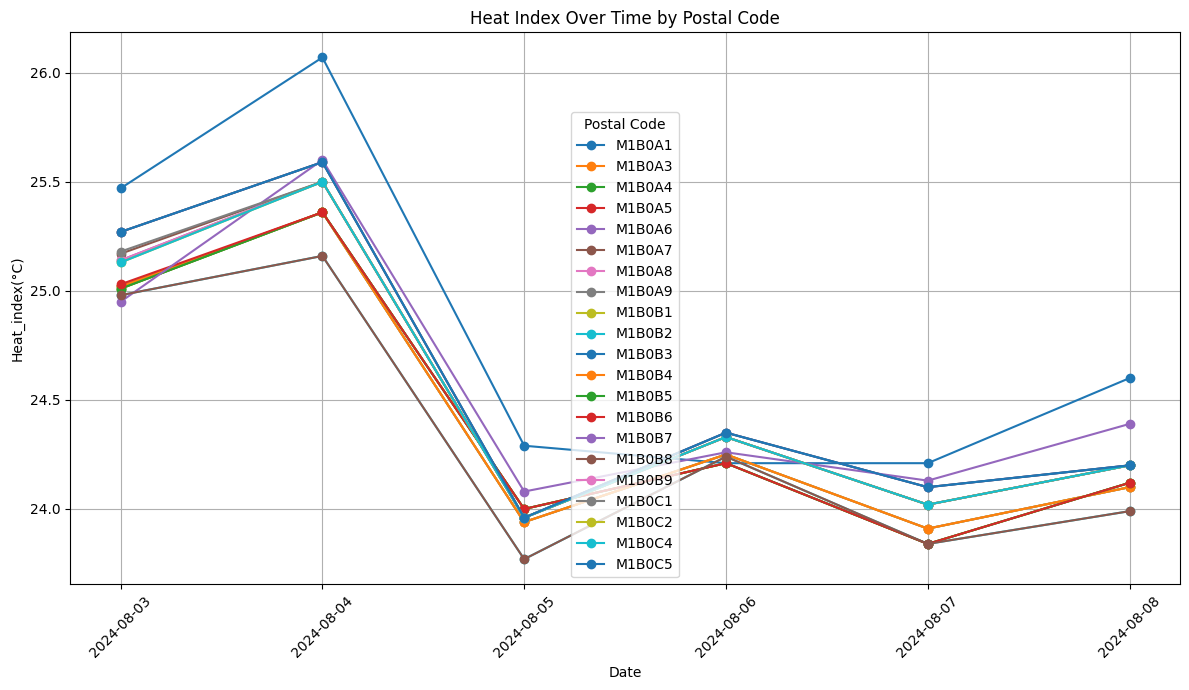

In [38]:
plt.figure(figsize=(12, 7))

for postal_code in future_forecast_df['postal_code'].unique():
    subset = future_forecast_df[future_forecast_df['postal_code'] == postal_code]
    plt.plot(subset['date'], subset['heat_index(°C)'], marker='o', label=postal_code)

plt.title('Heat Index Over Time by Postal Code')
plt.xlabel('Date')
plt.ylabel('Heat_index(°C)')
plt.legend(title='Postal Code')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The heat index trends over the past week for various postal codes in Toronto show a peak around August 3rd and 4th, reaching approximately 26°C, before experiencing a decline to around 24°C by August 6th, and a slight recovery afterwards.

In [39]:
future_forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   postal_code                126 non-null    object 
 1   city                       126 non-null    object 
 2   date                       126 non-null    object 
 3   population                 126 non-null    int64  
 4   sunrise                    126 non-null    object 
 5   sunset                     126 non-null    object 
 6   temperature(°C)            126 non-null    float64
 7   feels_like(°C)             126 non-null    float64
 8   temp_min(°C)               126 non-null    float64
 9   temp_max(°C)               126 non-null    float64
 10  atmospheric_pressure(hPa)  126 non-null    float64
 11  humidity(%)                126 non-null    float64
 12  wind_speed(m/s)            126 non-null    float64
 13  cloudiness_percentage      126 non-null    float64

In [40]:
my_engine = sa.create_engine(connection_url)

In [42]:
from sqlalchemy import Table, MetaData, Column, String, Float, Integer, Date, DECIMAL
from datetime import datetime

# Create the metadata object
metadata = MetaData()

# Define the table structure
table = Table('Forecast_Weather_Data', metadata,
    Column('postal_code', String(50)),
    Column('city', String(50)),
    Column('date', Date),
    Column('population', Integer),
    Column('sunrise', String(50)),
    Column('sunset', String(50)),
    Column('temperature(°C)', DECIMAL(10,2)),
    Column('feels_like(°C)', DECIMAL(10,2)),
    Column('temp_min(°C)', DECIMAL(10,2)),
    Column('temp_max(°C)', DECIMAL(10,2)),
    Column('atmospheric_pressure(hPa)', DECIMAL(10,2)),
    Column('humidity(%)', DECIMAL(10,2)),
    Column('wind_speed(m/s)', DECIMAL(10,2)),
    Column('cloudiness_percentage', DECIMAL(10,2)),
    Column('weather_description', String(50)),
    Column('typeofday', String(50)),
    Column('weather_today', String(50)),
    Column('heat_index(°C)', DECIMAL(10,2)),
    schema='uploads'
)

# Insert the data
with my_engine.connect() as conn:
    # Start a transaction
    with conn.begin():
        for _, row in future_forecast_df.iterrows():
            # Convert the row to a dictionary
            row_dict = row.to_dict()
            
            # Convert the date string to a datetime object
            row_dict['date'] = datetime.strptime(row_dict['date'], '%Y-%m-%d').date()
            
            # Insert the row
            ins = table.insert().values(**row_dict)
            conn.execute(ins)

print("Data insertion completed successfully.")

Data insertion completed successfully.


In [43]:
#function to request the data
my_query = sa.text("SELECT * FROM uploads.Forecast_Weather_Data;")

with my_engine.connect() as my_connection:
    my_forecastdata = pd.read_sql(sql=my_query, con=my_connection)

In [44]:
my_forecastdata

,postal_code,city,date,population,sunrise,sunset,temperature(°C),feels_like(°C),temp_min(°C),temp_max(°C),atmospheric_pressure(hPa),humidity(%),wind_speed(m/s),cloudiness_percentage,weather_description,typeofday,weather_today,heat_index(°C)
0,M1B0A1,Little India,2024-08-03,0,10:07:42,00:38:53,24.71,25.00,24.09,24.71,1009,71,2.06,100.00,overcast clouds,warm day,Cloudy,25.62
1,M1B0A1,Little India,2024-08-04,0,10:07:42,00:38:53,25.09,25.16,25.09,25.09,1011,61,2.53,40.00,clear sky,warm day,Clear,26.07
2,M1B0A1,Little India,2024-08-05,0,10:07:42,00:38:53,23.22,23.45,23.22,23.22,1014,69,2.88,66.13,light rain,warm day,Rainy,24.29
3,M1B0A1,Little India,2024-08-06,0,10:07:42,00:38:53,21.14,20.92,21.14,21.14,1015,61,3.42,92.63,overcast clouds,warm day,Cloudy,24.21
4,M1B0A1,Little India,2024-08-07,0,10:07:42,00:38:53,21.27,21.07,21.27,21.27,1010,62,5.05,60.63,overcast clouds,warm day,Cloudy,24.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,M1B0C5,West Hill,2024-08-04,0,10:07:14,00:38:59,24.52,24.42,24.52,24.52,1011,62,2.69,38.88,clear sky,warm day,Clear,25.59
626,M1B0C5,West Hill,2024-08-05,0,10:07:14,00:38:59,22.67,22.87,22.67,22.67,1014,69,2.47,65.88,clear sky,warm day,Clear,23.96
627,M1B0C5,West Hill,2024-08-06,0,10:07:14,00:38:59,20.72,20.43,20.72,20.72,1015,60,3.06,92.38,overcast clouds,warm day,Cloudy,24.35
628,M1B0C5,West Hill,2024-08-07,0,10:07:14,00:38:59,20.28,20.02,20.28,20.28,1010,63,3.55,63.50,overcast clouds,warm day,Cloudy,24.10


# Historic Weather Data

In [45]:
#create empty lists to store the data
historical_data_list=[]

In [46]:

# Function to generate the API URL for historical data
def generate_hist_api_url(latitude, longitude, start_date, end_date, variables, timezone="auto"):
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    variable_params = ",".join(variables)
    api_url = f"{base_url}?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily={variable_params}&timezone={timezone}"
    return api_url


In [47]:
# Define function to fetch historical weather data from the API
def fetch_hist_weather_data(api_url):
    response = requests.get(api_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses
    data = response.json()
    print("Returned data:", data)
    return data

# Function to extract relevant historical data from the API response
def extract_hist_weather_data(weather_data, postal_code):
    weather_data_list = []

    if 'daily' not in weather_data or 'time' not in weather_data['daily']:
        raise ValueError("No valid data returned from the API.")

    timezone = weather_data.get('timezone', 'Unknown')

    for i, day in enumerate(weather_data['daily']['time']):
        weather_data_list.append({
            "postal_code": postal_code,
            "city": timezone,
            "date": day,
            "max_temp(°C)": weather_data['daily']['temperature_2m_max'][i],
            "min_temp(°C)": weather_data['daily']['temperature_2m_min'][i],
            "mean_temp(°C)": weather_data['daily'].get('temperature_2m_mean', [None]*len(weather_data['daily']['time']))[i],
        })

    return weather_data_list

# Main function to fetch and clean historical weather data for multiple postal codes
def fetch_and_clean_hist_weather_data(postal_codes_df, variables, timezone="auto"):
    # Calculate date range for the past 7 days, excluding the current day
    end_date = (datetime.now().date() - timedelta(days=1)).strftime('%Y-%m-%d')
    start_date = (datetime.now().date() - timedelta(days=8)).strftime('%Y-%m-%d')

    all_weather_data = []

    for index, entry in postal_codes_df.iterrows():
        api_url = generate_hist_api_url(entry["latitude"], entry["longitude"], start_date, end_date, variables, timezone)
        weather_data = fetch_hist_weather_data(api_url)

        if weather_data:
            try:
                extracted_data = extract_hist_weather_data(weather_data, entry["postal_code"])
                all_weather_data.extend(extracted_data)
            except ValueError as e:
                print(f"Data processing error for postal code {entry['postal_code']}: {e}")

    # Convert to DataFrame
    historical_data_df = pd.DataFrame(all_weather_data)
    return historical_data_df

# Function to generate the API URL for historical data
def generate_hist_api_url(latitude, longitude, start_date, end_date, variables, timezone="auto"):
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    variable_params = ",".join(variables)
    api_url = f"{base_url}?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily={variable_params}&timezone={timezone}"
    return api_url

variables = ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean"]

# Fetch and clean historical weather data
historical_data_df = fetch_and_clean_hist_weather_data(postal_codes_df, variables)

# Check if the DataFrame 'historical_data_df' is not empty and print its contents
if historical_data_df is not None and not historical_data_df.empty:
    # Modify to the desired number of entries
    see_entries = 30
    print(historical_data_df.head(see_entries))
else:
    print("The DataFrame is empty.")

Returned data: {'latitude': 43.690685, 'longitude': -79.276, 'generationtime_ms': 0.06699562072753906, 'utc_offset_seconds': -14400, 'timezone': 'America/Toronto', 'timezone_abbreviation': 'EDT', 'elevation': 128.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'temperature_2m_mean': '°C'}, 'daily': {'time': ['2024-07-25', '2024-07-26', '2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30', '2024-07-31', '2024-08-01'], 'temperature_2m_max': [23.8, 23.4, 25.2, 25.6, 26.2, 26.0, 28.6, 27.7], 'temperature_2m_min': [16.0, 16.0, 15.6, 17.1, 18.9, 21.0, 21.1, 20.3], 'temperature_2m_mean': [19.9, 20.0, 21.1, 22.0, 22.8, 23.4, 24.7, None]}}
Returned data: {'latitude': 43.83128, 'longitude': -79.10742, 'generationtime_ms': 0.06389617919921875, 'utc_offset_seconds': -14400, 'timezone': 'America/Toronto', 'timezone_abbreviation': 'EDT', 'elevation': 123.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'temp

In [48]:
historical_data_df.head()

,postal_code,city,date,max_temp(°C),min_temp(°C),mean_temp(°C)
0,M1B0A1,America/Toronto,2024-07-25,23.8,16.0,19.9
1,M1B0A1,America/Toronto,2024-07-26,23.4,16.0,20.0
2,M1B0A1,America/Toronto,2024-07-27,25.2,15.6,21.1
3,M1B0A1,America/Toronto,2024-07-28,25.6,17.1,22.0
4,M1B0A1,America/Toronto,2024-07-29,26.2,18.9,22.8


In [49]:
historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   postal_code    168 non-null    object 
 1   city           168 non-null    object 
 2   date           168 non-null    object 
 3   max_temp(°C)   168 non-null    float64
 4   min_temp(°C)   168 non-null    float64
 5   mean_temp(°C)  147 non-null    float64
dtypes: float64(3), object(3)
memory usage: 8.0+ KB


In [50]:
# Fill missing values with the mean of the column
historical_data_df['max_temp(°C)'].fillna(historical_data_df['max_temp(°C)'].mean(), inplace=True)
historical_data_df['min_temp(°C)'].fillna(historical_data_df['min_temp(°C)'].mean(), inplace=True)
historical_data_df['mean_temp(°C)'].fillna(historical_data_df['mean_temp(°C)'].mean(), inplace=True)

C:\Users\alekh\AppData\Local\Temp\ipykernel_61520\2159607144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  historical_data_df['max_temp(°C)'].fillna(historical_data_df['max_temp(°C)'].mean(), inplace=True)
C:\Users\alekh\AppData\Local\Temp\ipykernel_61520\2159607144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

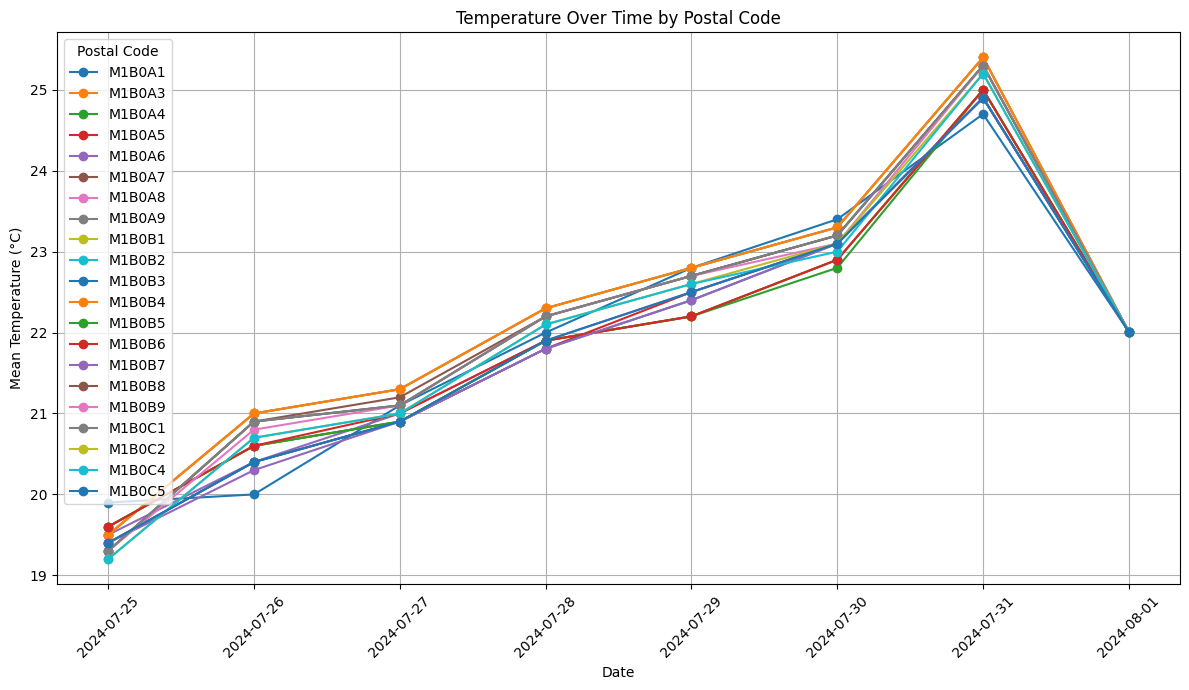

In [51]:
# plot graph for teperature over different postal codes
plt.figure(figsize=(12, 7))

for postal_code in historical_data_df['postal_code'].unique():
    subset = historical_data_df[historical_data_df['postal_code'] == postal_code]
    plt.plot(subset['date'], subset['mean_temp(°C)'], marker='o', label=postal_code)

plt.title('Temperature Over Time by Postal Code')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend(title='Postal Code')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The temperature trends across multiple postal codes in the area demonstrate consistent daily fluctuations over the observed period. Notably, there is a significant peak in mean temperature on July 31, 2024, suggesting a particularly warm day. 

In [52]:
#Ingesting the data into database in our Microsoft SQL Server
historical_data_df.to_sql(
    name   = 'Historic_Weather_Data',
    con    = my_engine,
    schema = 'uploads',
    if_exists = 'replace',
    index  = False,
    dtype  = {
        'postal_code':sa.types.VARCHAR[50],
        'city' :sa.types.VARCHAR[50],
        'date' :sa.types.DATE,
        'max_temp(°C)': sa.types.DECIMAL(10,2) ,
        'min_temp(°C)': sa.types.DECIMAL(10,2) , 
        'mean_temp(°C)' : sa.types.DECIMAL(10,2)

    },
    method = 'multi'
)

168

In [53]:
#function to request the data
my_query = sa.text("SELECT * FROM uploads.Historic_Weather_Data;")

with my_engine.connect() as my_connection:
    my_historicdata = pd.read_sql(sql=my_query, con=my_connection)

In [54]:
my_historicdata

,postal_code,city,date,max_temp(°C),min_temp(°C),mean_temp(°C)
0,M1B0A1,America/Toronto,2024-07-25,23.8,16.0,19.90
1,M1B0A1,America/Toronto,2024-07-26,23.4,16.0,20.00
2,M1B0A1,America/Toronto,2024-07-27,25.2,15.6,21.10
3,M1B0A1,America/Toronto,2024-07-28,25.6,17.1,22.00
4,M1B0A1,America/Toronto,2024-07-29,26.2,18.9,22.80
...,...,...,...,...,...,...
163,M1B0C5,America/Toronto,2024-07-28,27.2,15.5,21.90
164,M1B0C5,America/Toronto,2024-07-29,27.0,17.8,22.50
165,M1B0C5,America/Toronto,2024-07-30,26.5,19.9,23.10
166,M1B0C5,America/Toronto,2024-07-31,30.0,20.7,24.90
